<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
X_train[0].shape

(13,)

In [5]:
X_train[0].shape

(13,)

In [6]:
y_train.shape

(404,)

In [7]:
def base_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu',))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
estimator = KerasRegressor(build_fn=base_model, epochs=100, batch_size=5, verbose=0)
estimator.fit(X_train, y_train)


In [13]:
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -23.84 (11.23) MSE


In [14]:
pred = estimator.predict(X_test)

In [17]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=base_model, epochs=50, batch_size=5, verbose=0)))

estimators

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('mlp',
  <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor at 0x7f42cdd550b8>)]

In [18]:
pipeline = Pipeline(estimators)

In [20]:
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -21.75 (10.32) MSE


In [21]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, pred)

33.01164660214987

In [23]:
pipeline.fit(X_train, y_train)
standarized_pred = pipeline.predict(X_test)

In [24]:
mse(y_test, standarized_pred)

20.882648006985637

In [105]:
def big_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
 
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_squared_error'])
    return(model)

In [106]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=big_model, epochs=50, batch_size=5, verbose=0)))

In [107]:
pipeline = Pipeline(estimators)

In [108]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f42b36116a0>)],
         verbose=False)

In [109]:
big_pred = pipeline.predict(X_test)
mse(y_test, big_pred)

16.764312079744368

In [112]:
from sklearn.metrics import r2_score as r2

r2(y_test, big_pred)

0.7986120010326425

In [10]:
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

NameError: name 'cross_val_score' is not defined

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [28]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm



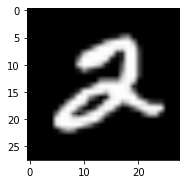

In [29]:
a = x_train[5]

fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.imshow(a, interpolation='bilinear', cmap=cm.Greys_r)

In [30]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [31]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [33]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [36]:
mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = mnist_model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=False)
scores = mnist_model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [38]:
pred = mnist_model.predict(x_test)

In [43]:
pred[0]

array([2.49695420e-09, 7.19980187e-11, 1.09435473e-06, 2.06471964e-06,
       1.14794901e-07, 9.16547532e-11, 1.40438920e-15, 9.99995232e-01,
       1.11681504e-10, 1.57531940e-06], dtype=float32)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.